In [ ]:
#########This Project is creted by Navaneeth#########
#Description: This Program uses Machine Learning to come up with a simple tradong/investment strategy

In [ ]:
#pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


In [ ]:
#Load the stock data
#from google.colab import files
#files.upload()

In [ ]:
#read in the csv file
df=pd.read_csv('AAPL.csv')
#show the data
df


,Date,Close,Volume,Open,High,Low
0,06-30-2025,205.1700,91912820,202.0100,207.3900,199.2607
1,06-27-2025,201.0800,73188570,201.8900,203.2200,200.0000
2,06-26-2025,201.0000,50799120,201.4300,202.6400,199.4600
3,06-25-2025,201.5600,39525730,201.4500,203.6700,200.6201
4,06-24-2025,200.3000,54064030,202.5900,203.4400,200.2000
...,...,...,...,...,...,...
1248,07-10-2020,95.9200,90257320,95.3350,95.9800,94.7052
1249,07-09-2020,95.6825,125642600,96.2625,96.3175,94.6725
1250,07-08-2020,95.3425,117091880,94.1800,95.3750,94.0900
1251,07-07-2020,93.1725,112424440,93.8525,94.6550,93.0575


In [ ]:
print(df.columns)

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [ ]:
df = pd.read_csv('AAPL.csv')
df.index = pd.to_datetime(df.Date)
df.drop('Date', axis=1, inplace=True)
df.dropna(inplace=True) # Drop rows with NaN values
df

,Close,Volume,Open,High,Low
Date,,,,,
2025-06-30,205.1700,91912820,202.0100,207.3900,199.2607
2025-06-27,201.0800,73188570,201.8900,203.2200,200.0000
2025-06-26,201.0000,50799120,201.4300,202.6400,199.4600
2025-06-25,201.5600,39525730,201.4500,203.6700,200.6201
2025-06-24,200.3000,54064030,202.5900,203.4400,200.2000
...,...,...,...,...,...
2020-07-10,95.9200,90257320,95.3350,95.9800,94.7052
2020-07-09,95.6825,125642600,96.2625,96.3175,94.6725
2020-07-08,95.3425,117091880,94.1800,95.3750,94.0900


In [ ]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [ ]:
# store the independent variables in a variable called 'X'
X = df[['Open-Close' , 'High-Low']]
# preview the first 5 rows of data
X.head()


,Open-Close,High-Low
Date,,
2025-06-30,-3.16,8.1293
2025-06-27,0.81,3.2200
2025-06-26,0.43,3.1800
2025-06-25,-0.11,3.0499
2025-06-24,2.29,3.2400


In [ ]:
#store the target variable into a variable called 'y'
#If tomorrow close price is greater than todays close price then put 1 , else put 0

y = np.where(df['Close'].shift(+1) > df['Close'], 1, 0)

In [ ]:
#show the data
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
#Get percentage split the data (90% train data set and 10%test data set)
percentage_split = 0.9
row = int( df.shape[0] * percentage_split)

#create the train data set
X_train=X[:row]
y_train=y[:row]

#create the test data
X_test=X[row:]
y_test=y[row:]

In [ ]:
# import the library for the machine learning model called Support Vector Classifier (SVC)
from sklearn.svm import SVC
# Create the model
model = SVC()
# Train the Model
model.fit(X_train[['Open-Close' , 'High-Low']] , y_train)

SVC()

SVC()

In [ ]:
# Checking the model score of train data
model.score(X_train[['Open-Close' , 'High-Low']] , y_train)

0.5341614906832298

In [ ]:
# Checking the model score of test data
model.score(X_test[['Open-Close' , 'High-Low']] , y_test)

0.5476190476190477

In [ ]:
# Make and show the models predictions
df['Predictions'] = model.predict(X[['Open-Close' , 'High-Low']])

# Show the predictions
df['Predictions']

,Predictions
Date,
2025-06-30,1
2025-06-27,1
2025-06-26,1
2025-06-25,1
2025-06-24,1
...,...
2020-07-10,1
2020-07-09,1
2020-07-08,1


In [ ]:
# calculate the daily returns
df['Return'] = df['Close'].pct_change(1)
#show the returns
df['Return']

,Return
Date,
2025-06-30,NaN
2025-06-27,-0.019935
2025-06-26,-0.000398
2025-06-25,0.002786
2025-06-24,-0.006251
...,...
2020-07-10,0.004635
2020-07-09,-0.002476
2020-07-08,-0.003553


In [ ]:
# calculate the strategy return
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
#Show the strategy return
df['Strat_Return']

,Strat_Return
Date,
2025-06-30,NaN
2025-06-27,-0.019935
2025-06-26,-0.000398
2025-06-25,0.002786
2025-06-24,-0.006251
...,...
2020-07-10,0.004635
2020-07-09,-0.002476
2020-07-08,-0.003553


In [ ]:
# Calculate the cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()
#Calculation of the strategy cumulative returns
df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

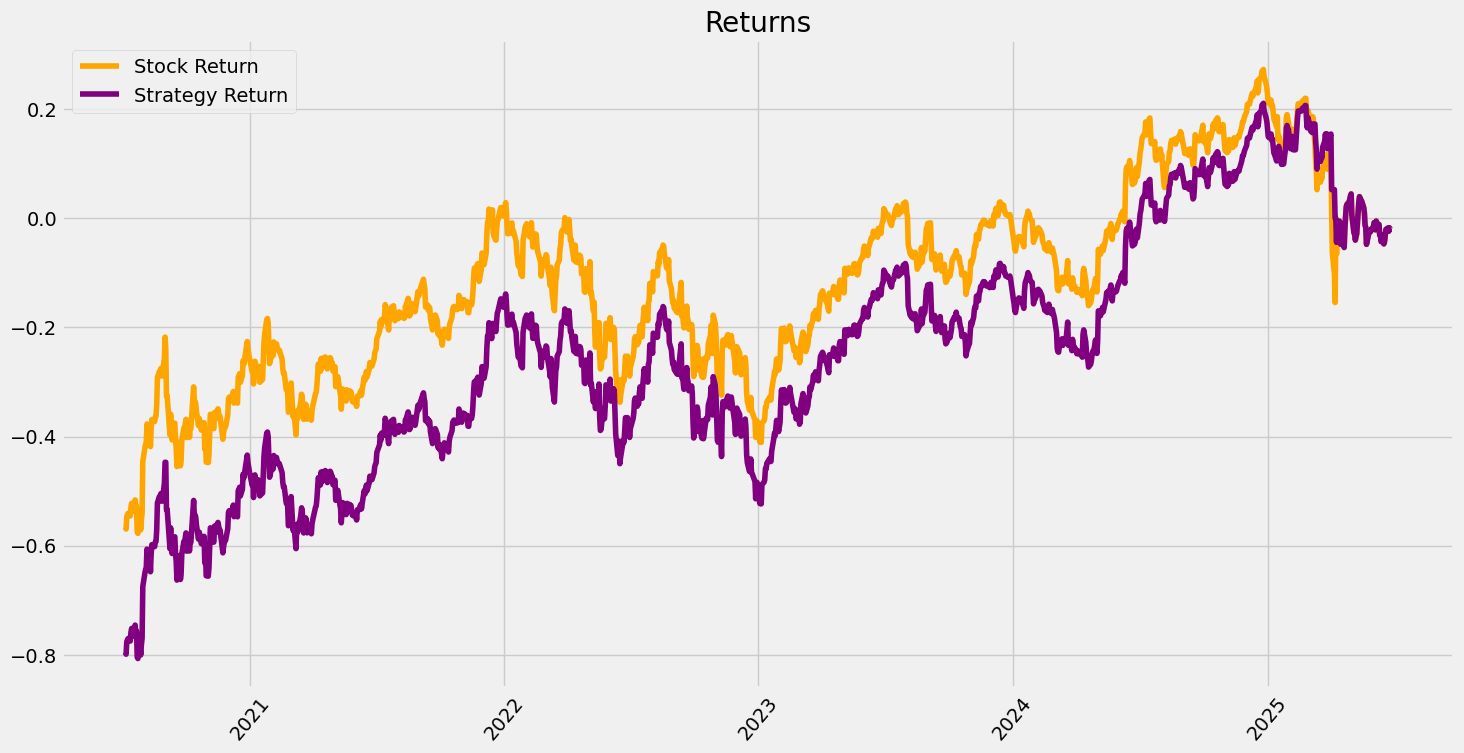

In [ ]:
# Visualize and show the data
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'] , color='orange' , label='Stock Return')
plt.plot(df['Cumul_Strategy'] , color='purple' , label='Strategy Return')
plt.xticks(rotation = 50)
plt.legend()
plt.show()

In [ ]:
#Print the results
print('The Stock Gives a return of' , df['Cumul_Ret'][-1]*100, '%')
print('The Strategy Gives a return of' , df['Cumul_Strategy'][-1]*100, '%')

The Stock Gives a return of -56.64477105472253 %
The Strategy Gives a return of -79.5801564644912 %
